---

## 2021-02-28

---


# 09-1 순차 데이터와 순차 신경망

- 순차 데이터, 순차 신경망, 셀, 은닉 상태
- 순차 데이터의 특징을 알고 순환 신경망의 개념 학습


## 순차 데이터

- 텍스트나 시계열 데이터와 같이 순서에 의미가 있는 데이터
- 순차 데이터를 다룰 때는 이전에 입력한 데이터를 기억하는 기능이 필요
- 피드포워드 신경망: 입력 데이터의 흐름이 앞으로만 전달되는 신경망


## 순환 신경망

- 완전 연결 신경망에 이전 데이터의 처리 흐름을 순환하는 고리 하나를 추가하면 됨
- 뉴런의 출력이 다시 자기 자신으로 전달
- 타임스텝: 하나씩 기억하면서 결과 도출
- 셀의 출력을 은닉 상태라 부름
- 은닉층의 활성화 함수로는 tanh 함수를 많이 사용 (-1 ~ 1 의 범위를 가짐)
- 이전 타임스텝의 은닉 상태에 곱해지는 가중치 하나 더 존재
- 모든 타임스텝에서 사용되는 가중치는 하나!!
- 맨 처음 샘플을 입력할 때는 이전 타임스텝이 없음


## 셀의 가중치와 입출력

- 순환층은 일반적으로 샘플마다 2개의 차원을 가짐
- 마지막 타임스텝의 은닉 상태만 출력으로 내보냄
- 마치 입력된 시퀀스 길이를 모두 읽어서 정보를 마지막 은닉 상태에 압축하여 전달하는 것처럼 볼 수 있음
- 순환층을 여러 개 쌓았을 때는 중간에 있는 건 모든 타임스텝의 은닉 상태를 출력


## 순환 신경망으로 순환 데이터 처리

- 은닉층의 출력을 다음 층으로만 보내지 않고 다음 순서에 다시 재사용하는 순환 구조
- 마지막 타임스텝의 출력만 다음 층으로 전달


# 09-2 순환 신경망으로 IMDB 리뷰 분류하기

- 말뭉치, 토큰, 원-핫 인코딩, 단어 임베딩
- 텐서플로를 사용해 순환 신경망을 만들어 영화 리뷰 데이터셋에 적용해서 리뷰를 긍정과 부정으로 분류


## IMDB 리뷰 데이터셋

- 자연어 처리(natural language processing): 컴퓨터를 사용해 인간의 언어를 처리하는 분야 (음성 인식, 기계 번역, 감성 분석)
- 단어를 하나의 정수에 매핑해서 사용, 매핑되는 정수는 단어의 의미나 크기와 관련 없음
- 토큰: 문장을 모두 소문자로 바꾸고 구둣점을 삭제한 다음 공백을 기준으로 분류
- 1개의 토큰이 하나의 타임스탬프에 해당
- 특정 정수는 특정한 용도로 예약되어 있음
```
    - 0: 패딩
    - 1: 문장의 시작
    - 2: 어휘 사전에 없는 토큰
```

In [1]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

17465344/17464789 [==============================] - 2s 0us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\bok_suh\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\bok_suh\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you m

In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [3]:
print(len(train_input[0]))

218


In [4]:
print(len(train_input[1]))

189


In [5]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [6]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [7]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, 
                                                                    test_size=0.2, random_state=42)

In [8]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [9]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


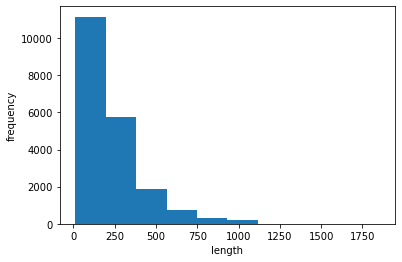

In [11]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

In [13]:
print(train_seq.shape)

(20000, 100)


In [16]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [17]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


- pad_sequences() 함수는 기본으로 maxlen보다 긴 시퀀스의 앞부분을 자름
- 뒷부분을 자르고 싶을 땐 truncating = 'post'로 바꾸면 됨

In [18]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [19]:
val_seq = pad_sequences(val_input, maxlen=100)

## 순환 신경망 만들기



In [20]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [21]:
train_oh = keras.utils.to_categorical(train_seq)

In [22]:
print(train_oh.shape)

(20000, 100, 500)


In [23]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [24]:
print(np.sum(train_oh[0][0]))

1.0


In [25]:
val_oh = keras.utils.to_categorical(val_seq)

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


## 순환 신경망 훈련하기

In [28]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
             metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                   validation_data=(val_oh, val_target),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 6s 15ms/step - loss: 0.7007 - accuracy: 0.5192 - val_loss: 0.6801 - val_accuracy: 0.5660
Epoch 2/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6719 - accuracy: 0.5839 - val_loss: 0.6370 - val_accuracy: 0.6388
Epoch 3/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6283 - accuracy: 0.6594 - val_loss: 0.6066 - val_accuracy: 0.6856
Epoch 4/100
313/313 [==============================] - 5s 15ms/step - loss: 0.5980 - accuracy: 0.6952 - val_loss: 0.5870 - val_accuracy: 0.7050
Epoch 5/100
313/313 [==============================] - 5s 15ms/step - loss: 0.5772 - accuracy: 0.7211 - val_loss: 0.5703 - val_accuracy: 0.7276
Epoch 6/100
313/313 [==============================] - 5s 15ms/step - loss: 0.5575 - accuracy: 0.7403 - val_loss: 0.5519 - val_accuracy: 0.7382
Epoch 7/100
313/313 [==============================] - 5s 15ms/step - loss: 0.5421 - accuracy: 0.7539 - val_loss: 0.5463 - val_accuracy:

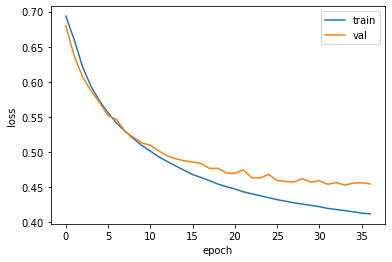

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 단어 임베딩을 사용하기

- 각 단어를 고정된 크기의 실수 벡터로 바꿔줌
- 장점: 입력으로 정수 데이터를 받음 --> 메모리 효율적으로 사용 가능


In [31]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [32]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [34]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                 restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 4s 10ms/step - loss: 0.6989 - accuracy: 0.5018 - val_loss: 0.6825 - val_accuracy: 0.5668
Epoch 2/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6720 - accuracy: 0.6108 - val_loss: 0.6507 - val_accuracy: 0.6748
Epoch 3/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6424 - accuracy: 0.6907 - val_loss: 0.6288 - val_accuracy: 0.7082
Epoch 4/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6204 - accuracy: 0.7223 - val_loss: 0.6131 - val_accuracy: 0.7230
Epoch 5/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5986 - accuracy: 0.7433 - val_loss: 0.5907 - val_accuracy: 0.7458
Epoch 6/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5796 - accuracy: 0.7564 - val_loss: 0.5746 - val_accuracy: 0.7516
Epoch 7/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5630 - accuracy: 0.7633 - val_loss: 0.5649 - val_accuracy:

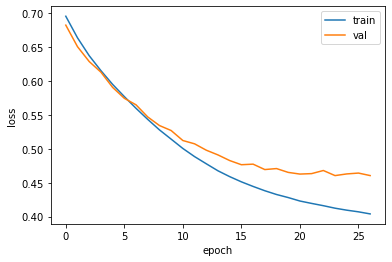

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 09-3 LSTM과 GRU 셀

- LSTM, 셀 상태, GRU
- 순환 신경망에서의 핵심 기술인 LSTM과 GRU 셀을 사용한 모델 만들기


## LSTM 구조

- Long Short-Term Memory
- 단기 기억을 오래 기억하기 위해 고안
- 셀 상태: 다음 층으로 전달되지 않고 LSTM 셀에서 순환만 되는 값
- 마치 작은 셀을 여러 개 포함하고 있는 큰 셀
- 입력과 은닉 상태에 곱해지는 가중치가 다르다!!
- 여기에 2개의 작은 셀이 더 추가되어 셀 상태를 만드는데 기여
- **총 4개의 셀 존재**
- 삭제 게이트: 셀 상태에 있는 정보를 제거하는 역할
- 입력 게이트: 새로운 정보를 셀 상태에 추가
- 출력 게이트: 셀 상태가 다음 은닉 상태로 출력


## LSTM 신경망 훈련하기

In [36]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, 
                                                                   train_target,
                                                                   test_size=0.2,
                                                                   random_state=42)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\bok_suh\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\bok_suh\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you m

In [38]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [39]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [41]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
             metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                 restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                   validation_data=(val_seq, val_target),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 21ms/step - loss: 0.6928 - accuracy: 0.5155 - val_loss: 0.6916 - val_accuracy: 0.5972
Epoch 2/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6907 - accuracy: 0.5975 - val_loss: 0.6884 - val_accuracy: 0.6308
Epoch 3/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6862 - accuracy: 0.6382 - val_loss: 0.6782 - val_accuracy: 0.6672
Epoch 4/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6680 - accuracy: 0.6684 - val_loss: 0.6103 - val_accuracy: 0.7114
Epoch 5/100
313/313 [==============================] - 6s 18ms/step - loss: 0.5944 - accuracy: 0.7301 - val_loss: 0.5716 - val_accuracy: 0.7416
Epoch 6/100
313/313 [==============================] - 6s 18ms/step - loss: 0.5612 - accuracy: 0.7442 - val_loss: 0.5496 - val_accuracy: 0.7466
Epoch 7/100
313/313 [==============================] - 6s 18ms/step - loss: 0.5352 - accuracy: 0.7638 - val_loss: 0.5285 - val_accuracy:

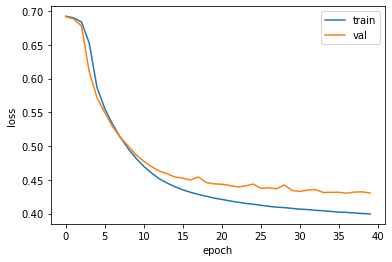

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 순환층에 드롭아웃 적용하기

- 순환층은 자체적으로 드롭아웃 기능 제공
- dropout: 셀의 입력에 드롭아웃 적용
- recurrent_dropout: 순환되는 은닉 상태에 드롭아웃 적용

In [43]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [45]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                 restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 22ms/step - loss: 0.6927 - accuracy: 0.5301 - val_loss: 0.6915 - val_accuracy: 0.5984
Epoch 2/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6907 - accuracy: 0.6074 - val_loss: 0.6873 - val_accuracy: 0.6352
Epoch 3/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6838 - accuracy: 0.6473 - val_loss: 0.6647 - val_accuracy: 0.6080
Epoch 4/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6427 - accuracy: 0.6499 - val_loss: 0.6033 - val_accuracy: 0.7282
Epoch 5/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5947 - accuracy: 0.7373 - val_loss: 0.5825 - val_accuracy: 0.7394
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5732 - accuracy: 0.7489 - val_loss: 0.5642 - val_accuracy: 0.7520
Epoch 7/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5587 - accuracy: 0.7520 - val_loss: 0.5488 - val_accuracy:

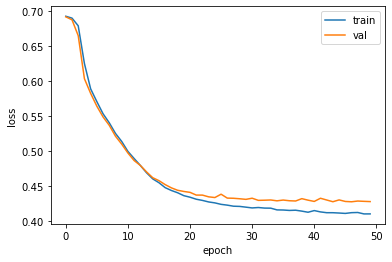

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 2개의 층을 연결하기

- 순환층의 은닉 상태는 샘플의 마지막 타임스텝에 대한 은닉 상태만 다음 층으로 전달

In [47]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [48]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [49]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                 restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 16s 38ms/step - loss: 0.6930 - accuracy: 0.5080 - val_loss: 0.6924 - val_accuracy: 0.5508
Epoch 2/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6918 - accuracy: 0.5649 - val_loss: 0.6894 - val_accuracy: 0.6096
Epoch 3/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6864 - accuracy: 0.6341 - val_loss: 0.6707 - val_accuracy: 0.5884
Epoch 4/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6493 - accuracy: 0.6649 - val_loss: 0.5927 - val_accuracy: 0.7264
Epoch 5/100
313/313 [==============================] - 11s 36ms/step - loss: 0.5831 - accuracy: 0.7210 - val_loss: 0.5527 - val_accuracy: 0.7410
Epoch 6/100
313/313 [==============================] - 11s 34ms/step - loss: 0.5474 - accuracy: 0.7408 - val_loss: 0.5282 - val_accuracy: 0.7520
Epoch 7/100
313/313 [==============================] - 11s 35ms/step - loss: 0.5280 - accuracy: 0.7519 - val_loss: 0.5085 - val_ac

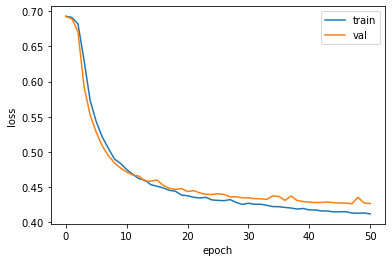

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## GRU 구조

- Gated Recurrent Unit
- 은닉 상태 하나만 포함
- 은닉 상태와 입력에 가중치를 곱하고 절편을 더하는 작은 셀이 2개 들어 있음
- LSTM보다 가중치가 작기 때문에 계산량이 적지만 LSTM 못지않은 좋은 성능을 냄


## GRU 신경망 훈련하기

In [52]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [53]:
model4.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru_1 (GRU)                  (None, 8)                 624       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [54]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                 restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 22ms/step - loss: 0.6926 - accuracy: 0.5222 - val_loss: 0.6912 - val_accuracy: 0.5628
Epoch 2/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6905 - accuracy: 0.5604 - val_loss: 0.6889 - val_accuracy: 0.5704
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6871 - accuracy: 0.5908 - val_loss: 0.6852 - val_accuracy: 0.5918
Epoch 4/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6830 - accuracy: 0.6089 - val_loss: 0.6791 - val_accuracy: 0.6112
Epoch 5/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6754 - accuracy: 0.6256 - val_loss: 0.6693 - val_accuracy: 0.6254
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6632 - accuracy: 0.6415 - val_loss: 0.6511 - val_accuracy: 0.6442
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6399 - accuracy: 0.6704 - val_loss: 0.6129 - val_accuracy:

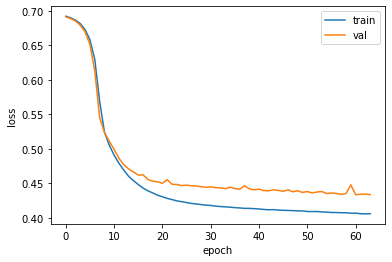

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()